# Programming Assignment Logistic Regression
Breast Cancer Prediction

In [1]:
#Import Important Libraries
from sklearn.datasets import load_breast_cancer # taking included data set from Sklearn http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Dataset
cancer = load_breast_cancer()

# Data Pre-Processing
Scale before splitting the data into train and test- scale the data since we will be using gradient ascent

In [3]:
x_scale = preprocessing.scale(cancer.data)
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25)

In [4]:
# Printing Names of the Features used for prediction.
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Implementing Logistic Regression Using Gradient Ascent

In [5]:
# Write code that computes sigmoid of z. Remember sigmoid can be scalar or a matrix.
def sigmoid(z):
    return np.exp(z) / (np.exp(z) + 1)

In [6]:
# Sigmoid of 0 should be equal to half.
print(sigmoid(0))

0.5


In [7]:
# Appending a Column of Ones in x_train.
# ones is a vector of shape n,1
ones = np.ones((x_train.shape[0],1))
# Append a column of ones in the beginning of x_train an save in variable a.
a=np.hstack((ones, x_train))
print(a.shape)

(426, 31)


In [8]:
# Initialize Parameter Vector w: A vector of shape x_train.shape[1],1
w = np.zeros((a.shape[1], 1))

In [9]:
# Hypothesis Function. Write code that computes hypothesis using a and w.
def hypothesis(a , w):
    return sigmoid(-1 * w.T.dot(a.T))

In [10]:
# Computing Predicted Values.
yhat = hypothesis(a, w)

# Likelihood Function.
Write the code to calculate the log likelihood as discussed in the class.

In [11]:
def likelihood(X_tr , Y_tr , w , n):
    
    yhat = hypothesis(X_tr, w)
    likelihood = np.sum(Y_tr * np.log(yhat) + (1 - Y_tr) * np.log(1 - yhat))
    
    return likelihood

In [12]:
# Before moving ahead, run this cell
print(likelihood(a,y_train,w,a.shape[0]))

-295.2806989185367


The value should be equal to -295.2806989185367. If this matches, your code is likely to be correct.

# Gradient Ascent

In [13]:
# Write the function that performs Gradient Ascent.
def Gradient_Ascent(a, y, learning_rate, num_iters):
    n = a.shape[0] # Number of training examples.
    # Initialize w. Zeros vector of shape x_train.shape[1],1
    w = np.zeros((a.shape[1], 1))
    # Reshape y to be a rank 2 matrix.
    y = y.reshape((y.shape[0],1))
    # Initiating list to store values of likelihood after few iterations.
    likelihood_values = []
    for i in range(num_iters):
        yhat = hypothesis(a, w)
        error = None
        gradient = a.T.dot(np.subtract(y, yhat))
        # Updating Parameters
        w = w + (learning_rate / n) * gradient
        if(i % 100 == 0):
            likelihood_values.append(likelihood(a,y,w,n))
        
    return w, likelihood_values

In [14]:
# Call Gradient_Ascent method by passing appropriate values of learning rate and num_iterations.
learning_rate = 0.001
num_iters = 1000
w, likelihood_values = Gradient_Ascent(a, y_train, learning_rate, num_iters)
print((likelihood_values))

[-125793.93786571072, -133210.9724380672, -152285.52421187112, -179652.7029404438, -212787.55200753344, -249903.13518750743, -289749.39077327633, -331469.30804002506, -374483.98951430945, -418404.5583779604]


# Plotting Likelihood v/s Number of Iterations.

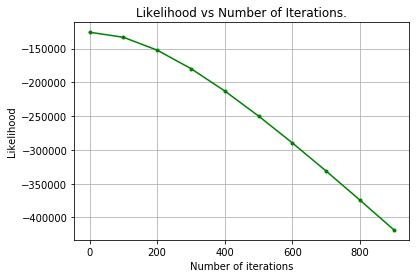

In [15]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

You should see the likelihood increasing as number of Iterations increase.

In [16]:
# Write the function to compute predicted values using a and w.
def predict(a, w):
    yhat = hypothesis(np.hstack((np.ones((a.shape[0],1)), a)), w)
    
    return yhat

In [17]:
yhat = predict(x_test, w)

In [18]:
# Read the comments in the function carefully.
def precision_recall(yhat, y , threshold):
    # Write code to compute precision and recall
    # Before finding precision or recall, you have to convert yhat into a vector of zeros and ones using threshold.
    # Values in yhat > threshold should be equal to 1 and others should be 0.
    yhat[yhat > threshold] = 1
    yhat[yhat <= threshold] = 0
    
    tp = np.sum(np.logical_and(yhat == 1, y == 1))
    fp = np.sum(np.logical_and(yhat == 1, y == 0))
    fn = np.sum(np.logical_and(yhat == 0, y == 1))
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return precision,recall

In [19]:
precision, recall = precision_recall(yhat, y_test, 0.1)

In [20]:
def f_score(precision, recall):
    return 2*(recall * precision) / (recall + precision)

f_score(precision, recall)

0.3393623836329685

# Fitting Model using Sk Learn Library. 

In [21]:
# Create object of logistic regression model. Pass a large value of C as C = 1/lambda.
# So, lambda will become nearly 0.
logreg = LogisticRegression(C=10000)

In [22]:
# Fitting the training set. # Write code to fit the model on the training set.
# Don't use matrix a. Instead, use x_train.
logreg = logreg.fit(x_train, y_train)

In [23]:
# Find the predicted values on training set using logreg.predict
# Here, it will return a vector of zeros and ones.
yhat = logreg.predict(x_test)
# Find the accuracy achieved on training set.
acc = logreg.score(x_test, y_test)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.944056


In [24]:
# Printing the parameters.
# Retrieving the parameters computed by logreg.
w = logreg.coef_
intercept = logreg.intercept_
# You can compare the parameters computed by logreg model and gradient ascent. They should be nearly same.

# Performance Metrics:


In [25]:
from sklearn.metrics import precision_recall_fscore_support
# Find Precision, recall and fscore using precision_recall_fscore_support nethod of sklearn.
prec , recal , fscore,_ = precision_recall_fscore_support(y_test, yhat)
print(prec, recal, fscore)

[0.89285714 0.97701149] [0.96153846 0.93406593] [0.92592593 0.95505618]


You can compare the values of precision, recall and fscore using the methods you wrote and using sklearn method.
To match the values of precision, recall and fscore using both methods, you will have to try different values of threshold in your method.

# Regularization

Question 4 of the written assignment portion:
- Modify your lab for logistic regression to now include ridge regression
- Add to this lab 5 fold cross validation
- Add confusion Matrix

In [56]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier

# 5 fold cross validation
kf = KFold(n_splits=5)

# Initialize alphas 
nalpha = 100
alphas = np.logspace(-3,1,nalpha)

alphaScores = []
Scores = []
coeffs = []

for train_index, test_index in kf.split(x_scale):
    X_train, X_test = x_scale[train_index], x_scale[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridgereg = RidgeClassifier(fit_intercept=True)
    
    scoresInd = []
    coeffsInd = []
    
    for a in alphas :
        ridgereg.set_params(alpha=a)
        ridgereg.fit(X_train, y_train)
        scoresInd.append(ridgereg.score(X_test, y_test))
        coeffsInd.append(ridgereg.coef_)
    
    opt_alpha = alphas[np.argmax(scoresInd)]
    opt_score = scoresInd[np.argmax(scoresInd)]
    opt_coeffs = coeffsInd[np.argmax(scoresInd)]
    
    alphaScores.append(opt_alpha)
    Scores.append(opt_score)
    coeffs.append(opt_coeffs)

optimal_round = np.argmax(Scores)
print("Optimal Round:", optimal_round)
print("Optimal Lambda:", alphaScores[optimal_round])
print("Optimal Score:", Scores[optimal_round])
print("Optimal Coefficiants:", coeffs[optimal_round])

i = -1
for train_index, test_index in kf.split(x_scale):
    i += 1
    if i == optimal_round:
        X_train, X_test = x_scale[train_index], x_scale[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        ridgereg = RidgeClassifier(fit_intercept=True, alpha=alphaScores[optimal_round])
        ridgereg.fit(X_train, y_train)
        yhat_test = ridgereg.predict(x_scale)
        
        tp = np.sum(np.logical_and(yhat_test == 1, y == 1))
        fp = np.sum(np.logical_and(yhat_test == 1, y == 0))
        tn = np.sum(np.logical_and(yhat_test == 0, y == 0))
        fn = np.sum(np.logical_and(yhat_test == 0, y == 1))
        
        print("\nConfusion Matrix (for entire dataset)")
        print(np.array([[tp, fp], [tn, fn]]))
        

Optimal Round: 3
Optimal Lambda: 0.4229242874389499
Optimal Score: 1.0
Optimal Coefficiants: [[ 0.19538279  0.02441273 -0.28551651  0.13116921 -0.03555937  0.37244861
  -0.16743863 -0.23659015  0.03707835  0.0200538  -0.34649613  0.03180493
   0.0559331   0.18336939 -0.0997502  -0.03562087  0.17074315 -0.084088
  -0.00927225  0.06025675 -0.99996196 -0.17660609 -0.14389716  0.75531302
   0.01707617  0.06542849 -0.11300781 -0.09026116 -0.12724142 -0.20934342]]

Confusion Matrix (for entire dataset)
[[356  17]
 [195   1]]
